# Public Transportations

# Introduction:

### Extensive Spanish High Speed Rail tickets pricing data analysis.
### This sample around 30 days , 2.5 million rows.

##### About the columns:

- insert date
- origin - from where
- destination
- start_date - start trip
- end_date- end trip
- train_type
- price
- train_class
- fare


# Mission

- Data Exploration and analysis
- Analyze and Explore DataSet


# Random Forest



##### Plot Graph

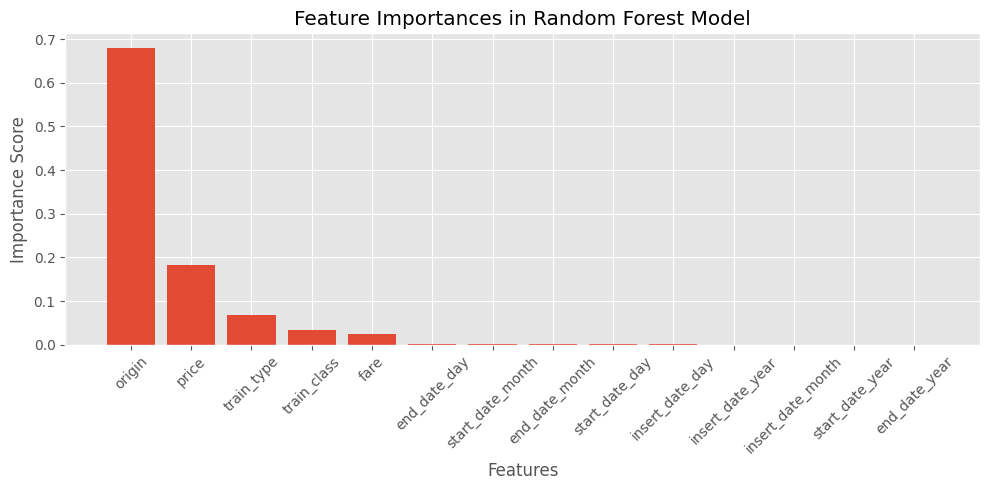

In [79]:
import matplotlib.pyplot as plt

# Feature importances from the model
feature_importances = rf.feature_importances_

# Assuming X includes the preprocessed features of your dataset
feature_names = X.columns  # Ensure X has the correct columns after preprocessing
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Create a bar chart for feature importances
plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_features)), [val[1] for val in sorted_features], tick_label=[val[0] for val in sorted_features])
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances in Random Forest Model')
plt.tight_layout()
plt.show()


##### Data Preprocessing

In [ ]:
# Drop rows with NaN values as a quick fix
X_train = X_train.dropna()
y_train = y_train.dropna()

# Ensure y_train is of type integer if it's a classification label
y_train = y_train.astype(int)

In [ ]:
# Check for null values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

Unnamed: 0     0
insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
train_class    0
fare           0
dtype: int64
0


##### Step5: Train Model

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming the best_random_state has been determined in a previous step of your analysis
best_random_state = 100

# Initialize the RandomForestClassifier with the best found random state
rf = RandomForestClassifier(random_state=best_random_state, n_jobs=-1, max_depth=7,
                            min_samples_leaf=1, min_samples_split=5,
                            n_estimators=50, oob_score=True)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate the accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy as a percentage with 2 decimal places
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Accuracy: 92.02%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93     34736
           1       1.00      1.00      1.00    106241
           2       0.79      0.65      0.72      6300
           3       0.70      0.97      0.81     30726
           4       0.92      0.68      0.78     30704

    accuracy                           0.92    208707
   macro avg       0.88      0.84      0.85    208707
weighted avg       0.93      0.92      0.92    208707



##### Step4: Split dataset

In [93]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

predictors = df.drop("price", axis=1)
predictors = scaler.fit_transform(predictors)
price = df["price"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,price,test_size=0.30,random_state=0)

ValueError: could not convert string to float: '2019-04-19 05:31:43'

In [83]:
X_train.shape

(834827, 14)

In [84]:
X_test.shape

(208707, 14)

In [85]:
y_train.shape

(834827,)

In [86]:
y_test.shape

(208707,)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### Step3: Preapring the variables

In [88]:
# Preparing the features (X) and target variable (Y)
X = df.drop(['price'], axis=1)
Y = df['price']

# Display the first few rows of X and Y to verify
print(X.head())
print(Y.head())



   Unnamed: 0          insert_date  origin destination           start_date  \
0           0  2019-04-19 05:31:43  MADRID     SEVILLA  2019-05-29 06:20:00   
1           1  2019-04-19 05:31:43  MADRID     SEVILLA  2019-05-29 07:00:00   
2           2  2019-04-19 05:31:43  MADRID     SEVILLA  2019-05-29 07:30:00   
3           3  2019-04-19 05:31:43  MADRID     SEVILLA  2019-05-29 08:00:00   
4           4  2019-04-19 05:31:43  MADRID     SEVILLA  2019-05-29 08:30:00   

              end_date train_type train_class   fare  insert_date_hour  ...  \
0  2019-05-29 09:16:00    AV City     Turista  Promo                 5  ...   
1  2019-05-29 09:32:00        AVE     Turista  Promo                 5  ...   
2  2019-05-29 09:51:00        AVE     Turista  Promo                 5  ...   
3  2019-05-29 10:32:00        AVE  Preferente  Promo                 5  ...   
4  2019-05-29 11:14:00      ALVIA     Turista  Promo                 5  ...   

   start_date_weekday  start_date_month  start_dat

##### Step2: Import Dataset

In [ ]:
df =pd.read_csv("./public_transportation_data.csv")

##### Step1: Import libraries

In [91]:
## Import all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # statistical data visualization
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
df.describe()

,Unnamed: 0,price,insert_date_hour,insert_date_minute,insert_date_second,insert_date_day,insert_date_month,insert_date_year,start_date_hour,start_date_minute,start_date_second,start_date_day,start_date_month,start_date_year,end_date_hour,end_date_minute,end_date_second,end_date_day,end_date_month,end_date_year
count,1.043534e+06,970506.000000,1.043534e+06,1.043534e+06,1.043534e+06,1.043534e+06,1043534.0,1043534.0,1.043534e+06,1.043534e+06,1043534.0,1.043534e+06,1.043534e+06,1043534.0,1.043534e+06,1.043534e+06,1043534.0,1.043534e+06,1.043534e+06,1043534.0
mean,5.217665e+05,62.854765,1.164786e+01,2.344120e+01,2.952147e+01,2.307554e+01,4.0,2019.0,1.317614e+01,2.285272e+01,0.0,1.739247e+01,4.880514e+00,2019.0,1.581806e+01,2.997047e+01,0.0,1.738502e+01,4.881336e+00,2019.0
std,3.012425e+05,25.723718,6.790812e+00,1.414707e+01,1.729444e+01,2.922439e+00,0.0,0.0,4.658833e+00,1.762970e+01,0.0,9.373931e+00,4.785939e-01,0.0,4.907673e+00,1.679157e+01,0.0,9.377529e+00,4.786183e-01,0.0
min,0.000000e+00,16.600000,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,4.0,2019.0,2.000000e+00,0.000000e+00,0.0,1.000000e+00,4.000000e+00,2019.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,4.000000e+00,2019.0
25%,2.608832e+05,43.550000,6.000000e+00,1.100000e+01,1.500000e+01,2.100000e+01,4.0,2019.0,9.000000e+00,5.000000e+00,0.0,9.000000e+00,5.000000e+00,2019.0,1.200000e+01,1.700000e+01,0.0,9.000000e+00,5.000000e+00,2019.0
50%,5.217665e+05,60.300000,1.100000e+01,2.300000e+01,2.900000e+01,2.300000e+01,4.0,2019.0,1.400000e+01,2.500000e+01,0.0,1.900000e+01,5.000000e+00,2019.0,1.600000e+01,3.000000e+01,0.0,1.900000e+01,5.000000e+00,2019.0
75%,7.826498e+05,76.300000,1.700000e+01,3.500000e+01,4.500000e+01,2.500000e+01,4.0,2019.0,1.700000e+01,4.000000e+01,0.0,2.600000e+01,5.000000e+00,2019.0,2.000000e+01,4.500000e+01,0.0,2.600000e+01,5.000000e+00,2019.0
max,1.043533e+06,214.200000,2.300000e+01,5.900000e+01,5.900000e+01,3.000000e+01,4.0,2019.0,2.200000e+01,5.800000e+01,0.0,3.100000e+01,6.000000e+00,2019.0,2.300000e+01,5.900000e+01,0.0,3.100000e+01,6.000000e+00,2019.0


In [ ]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
#Importing the dataset
df =pd.read_csv("./public_transportation_data.csv")

# look the data set
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo


In [ ]:
# looking the shape DataSet
df.shape

(624521, 10)

- We have 2,579,771 rows.

In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624521 entries, 0 to 624520
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   624521 non-null  int64  
 1   insert_date  624521 non-null  object 
 2   origin       624521 non-null  object 
 3   destination  624521 non-null  object 
 4   start_date   624520 non-null  object 
 5   end_date     624520 non-null  object 
 6   train_type   624520 non-null  object 
 7   price        582259 non-null  float64
 8   train_class  622424 non-null  object 
 9   fare         622424 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 47.6+ MB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Conversion data type column - date from object to Datetime

df["insert_date"]=pd.to_datetime(df["insert_date"])

In [ ]:
# look  describe data set
df["price"].describe().round(2)

count    582259.00
mean         63.15
std          25.93
min          16.60
25%          43.55
50%          60.30
75%          76.30
max         214.20
Name: price, dtype: float64

- Average price 63

In [ ]:
#checking null value
df.isna().sum()

Unnamed: 0         0
insert_date        0
origin             0
destination        0
start_date         1
end_date           1
train_type         1
price          42262
train_class     2097
fare            2097
dtype: int64

- we have missing data

# Decision Tree

Accuracy of the Decision Tree model: 98.68%


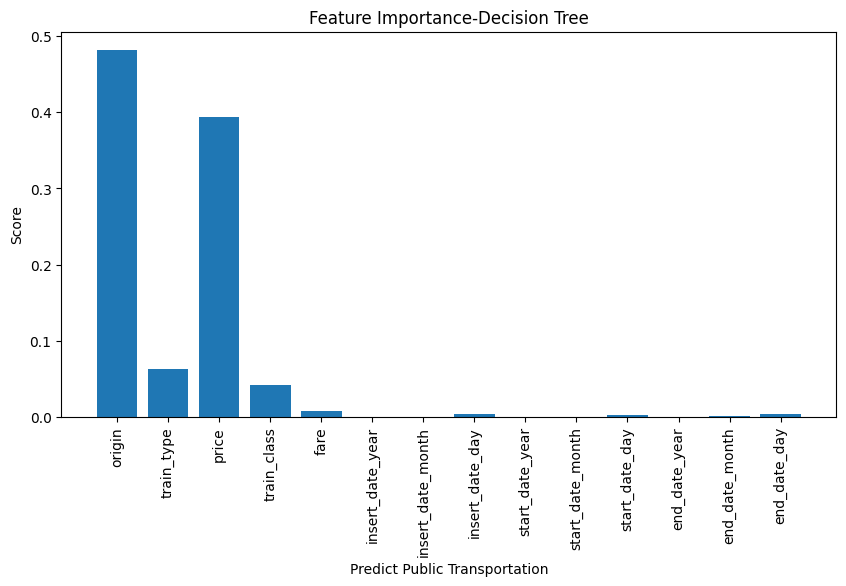

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = '/content/public_transportation_data.csv'
data = pd.read_csv(file_path)

# Preprocess the Data
# Convert date columns to datetime
data['insert_date'] = pd.to_datetime(data['insert_date'])
data['start_date'] = pd.to_datetime(data['start_date'])
data['end_date'] = pd.to_datetime(data['end_date'])

# Extract features from date columns (e.g., year, month, day)
data['insert_date_year'] = data['insert_date'].dt.year
data['insert_date_month'] = data['insert_date'].dt.month
data['insert_date_day'] = data['insert_date'].dt.day
data['start_date_year'] = data['start_date'].dt.year
data['start_date_month'] = data['start_date'].dt.month
data['start_date_day'] = data['start_date'].dt.day
data['end_date_year'] = data['end_date'].dt.year
data['end_date_month'] = data['end_date'].dt.month
data['end_date_day'] = data['end_date'].dt.day

# Drop the original date columns
data = data.drop(columns=['insert_date', 'start_date', 'end_date'])

# Handling missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

# Encoding categorical features
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Selecting features and target
features = ['origin', 'train_type', 'price', 'train_class', 'fare',
            'insert_date_year', 'insert_date_month', 'insert_date_day',
            'start_date_year', 'start_date_month', 'start_date_day',
            'end_date_year', 'end_date_month', 'end_date_day']
X = data[features]
y = data['destination']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Predicting the Test set results
y_pred = decision_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100

# Print the accuracy as a percentage
print(f'Accuracy of the Decision Tree model: {accuracy_percentage:.2f}%')

# Plotting a graph (e.g., feature importance)
feature_importance = decision_tree.feature_importances_
plt.figure(figsize=(10, 5))

# plt.bar(range(len(feature_importance)), feature_importance)
plt.bar(range(len(features)), feature_importance)
plt.xticks(range(len(features)), features, rotation=90)
plt.xlabel('Predict Public Transportation')
plt.ylabel('Score')
plt.title('Feature Importance-Decision Tree')
plt.show()

# Handle missing data

In [76]:
for col in ['insert_date', 'start_date', 'end_date']:
    date_col = pd.to_datetime(df[col])
    df[col + '_hour'] = date_col.dt.hour
    df[col + '_minute'] = date_col.dt.minute
    df[col + '_second'] = date_col.dt.second
    df[col + '_day'] = date_col.dt.day
    df[col + '_weekday'] = date_col.dt.day_name()
    df[col + '_month'] = date_col.dt.month
    df[col + '_year'] = date_col.dt.year

In [77]:
# fill the column price based on origin

avg=df.groupby(["origin"])["price"].mean()
avg

origin
BARCELONA     84.192885
MADRID        63.685777
PONFERRADA    42.275427
SEVILLA       63.016268
VALENCIA      39.528087
Name: price, dtype: float64

In [78]:
# fill nan in the column price
df['price'].fillna(avg,inplace=True)


In [ ]:
# drop na value in this columns train class and fare

df.dropna(inplace=True)

In [ ]:
#checking null value - again
df.isna().sum()

Unnamed: 0     0
insert_date    0
origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

In [ ]:
# looking the shape DataSet after handle missing data
df.shape

(582259, 10)

- We have 2,579,771 rows.after handle missing data

In [ ]:
# add column Day

df["Day"]=df["insert_date"].dt.day_name()

In [ ]:
# defined function to calculate the time trip

df = df.reset_index()

datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = dt.datetime.strptime(b, datetimeFormat)- dt.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)

In [ ]:
# add column trip duration

df["Trip duration"] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1)


In [ ]:
# add columns day and month and years

df["Month"]=df["insert_date"].dt.month
df["day"]=df["insert_date"].dt.day
df["year"]=df["insert_date"].dt.year

In [ ]:
# show the data
df.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration,Month,day,year
0,0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo,Friday,2.933333,4,19,2019
1,1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo,Friday,2.533333,4,19,2019
2,2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo,Friday,2.350000,4,19,2019
3,3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo,Friday,2.533333,4,19,2019
4,5,5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo,Friday,2.633333,4,19,2019


In [ ]:
df["year"].unique()

array([2019])

In [ ]:
df["Month"].unique()

array([4])

In [ ]:
df["day"].unique()

array([19, 20, 21, 22, 23])

- from 19/4 to 18/5 year 2019

In [ ]:
# calculate number of days

num_day=df["insert_date"].dt.date.value_counts()
num_day=pd.DataFrame(num_day)
num_day.shape

(5, 1)

- 29 Days

# Visualizations

In [ ]:
# The people start trip from this stations.

plt.figure(figsize=(20,10))
sns.countplot(df['origin'])
plt.show

NameError: name 'plt' is not defined

##### The people start trip from this stations.

- MADRID 52%
- BARCELONA 15%
- SEVILLA 15%
- VALENCIA 13%
- PONFERRADA 5 %

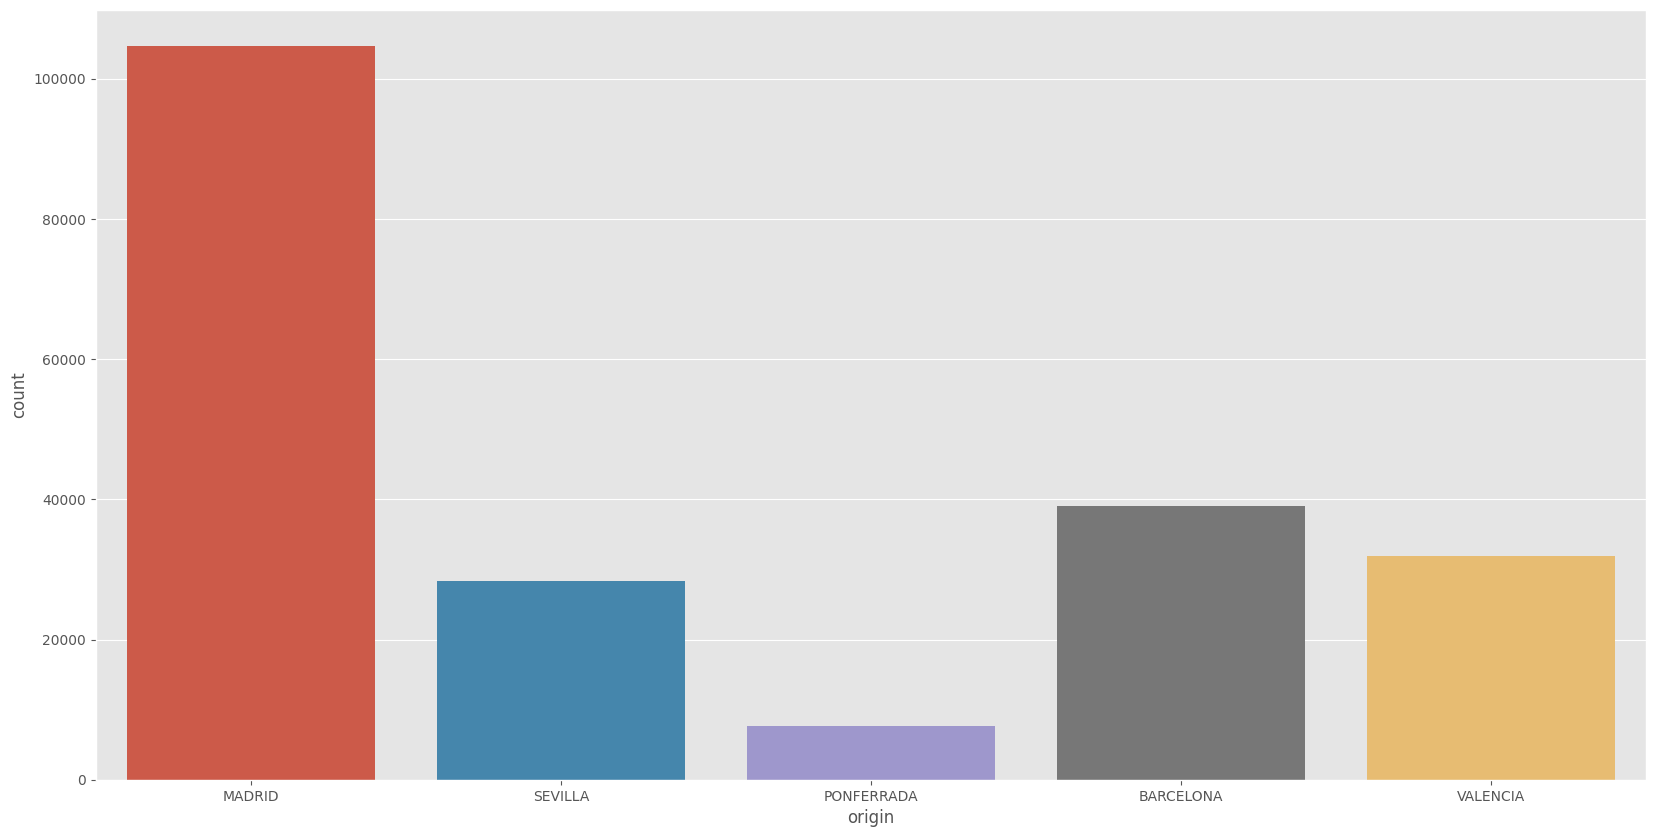

In [ ]:
# The people finish trip from this stations.
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already defined.

plt.figure(figsize=(20, 10))  # Set the size of the figure
sns.countplot(x='origin', data=df)  # Create a count plot for the 'origin' column
plt.show()  # Corrected to 'plt.show()' to actually display the plot


#### The people finish trip from this stations:

- MADRID 47%
- BARCELONA 18%
- SEVILLA 16%
- VALENCIA 15 %
- PONFERRADA 4%

#### Most people using train insite Madrid

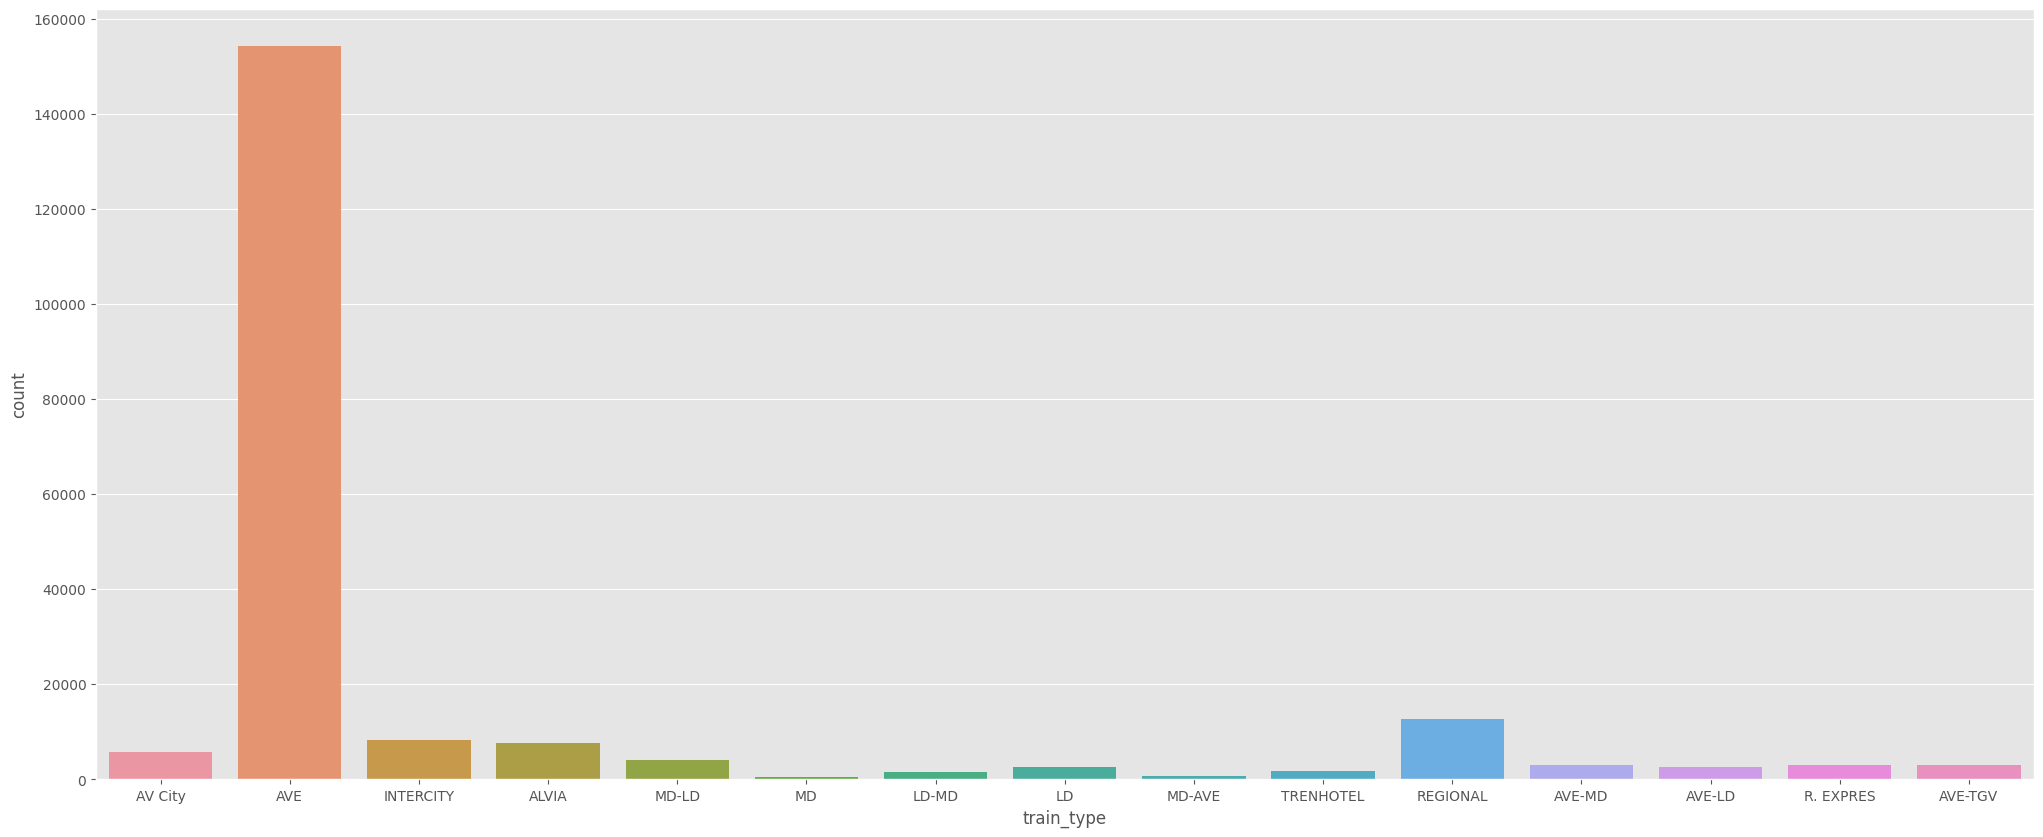

In [ ]:
# the train type more popular there/ more using

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'df' is your DataFrame and it's already defined.
# Also, ensure 'df' contains a column named 'train_type'.

plt.figure(figsize=(25, 10))  # Set the size of the figure
sns.countplot(x='train_type', data=df)  # Create a count plot for the 'train_type' column
plt.show()  # Call plt.show() to display the plot


#### The train type more popular there/ more using:

- AVE 70%
- ALVIA 7%
- REGIONAL 5%

- Other train less 5 %



<Axes: xlabel='train_type', ylabel='price'>

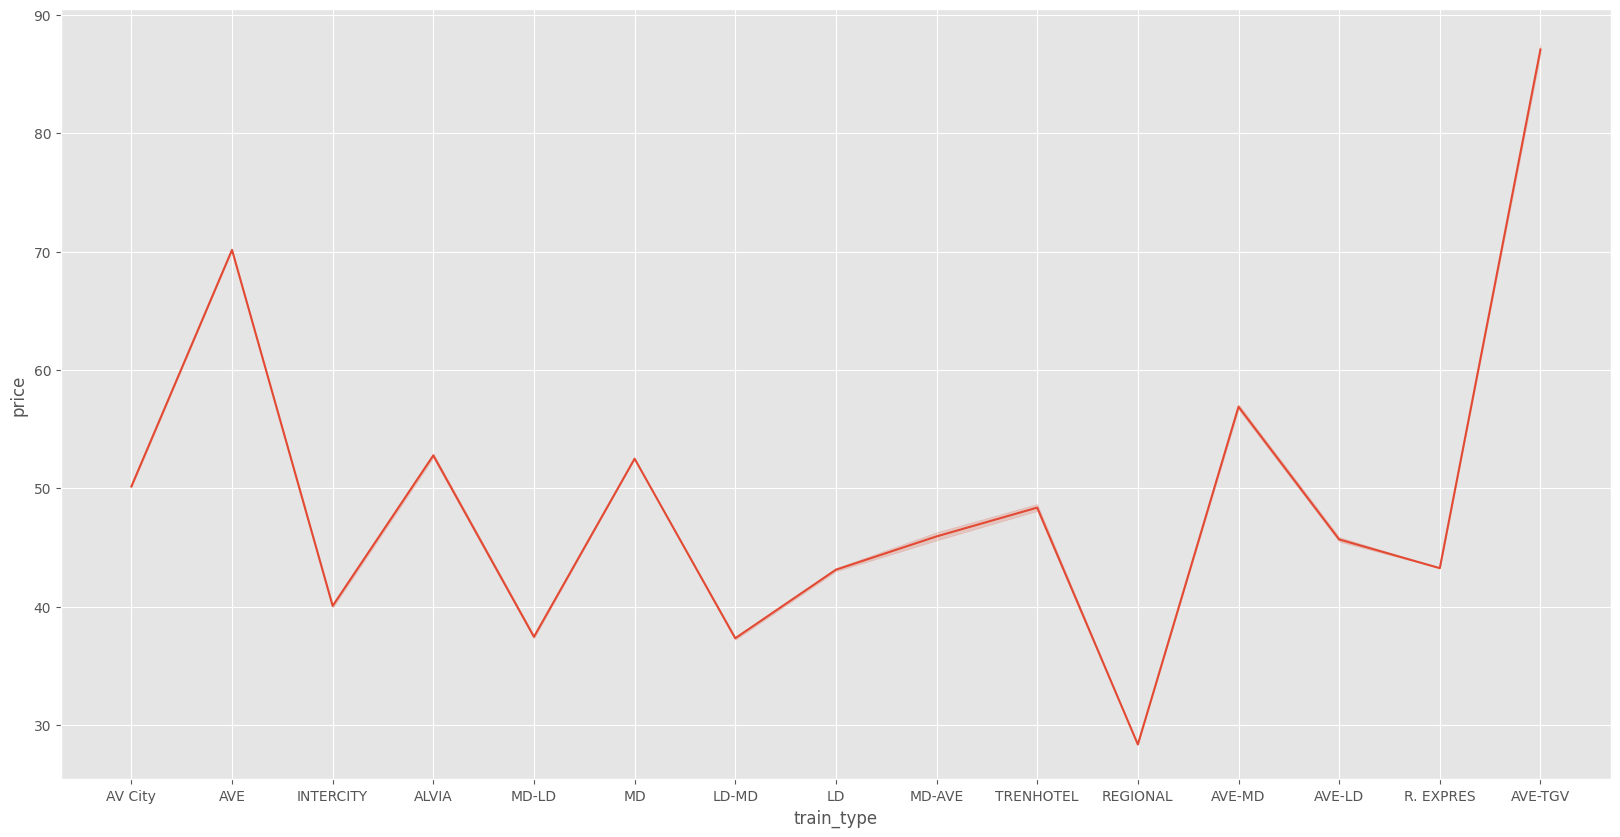

In [ ]:
# any relationship between train type and price ?

plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_type",y="price")

- The train AVE not cheap but more people using this type of train

<Axes: xlabel='train_type', ylabel='Trip duration'>

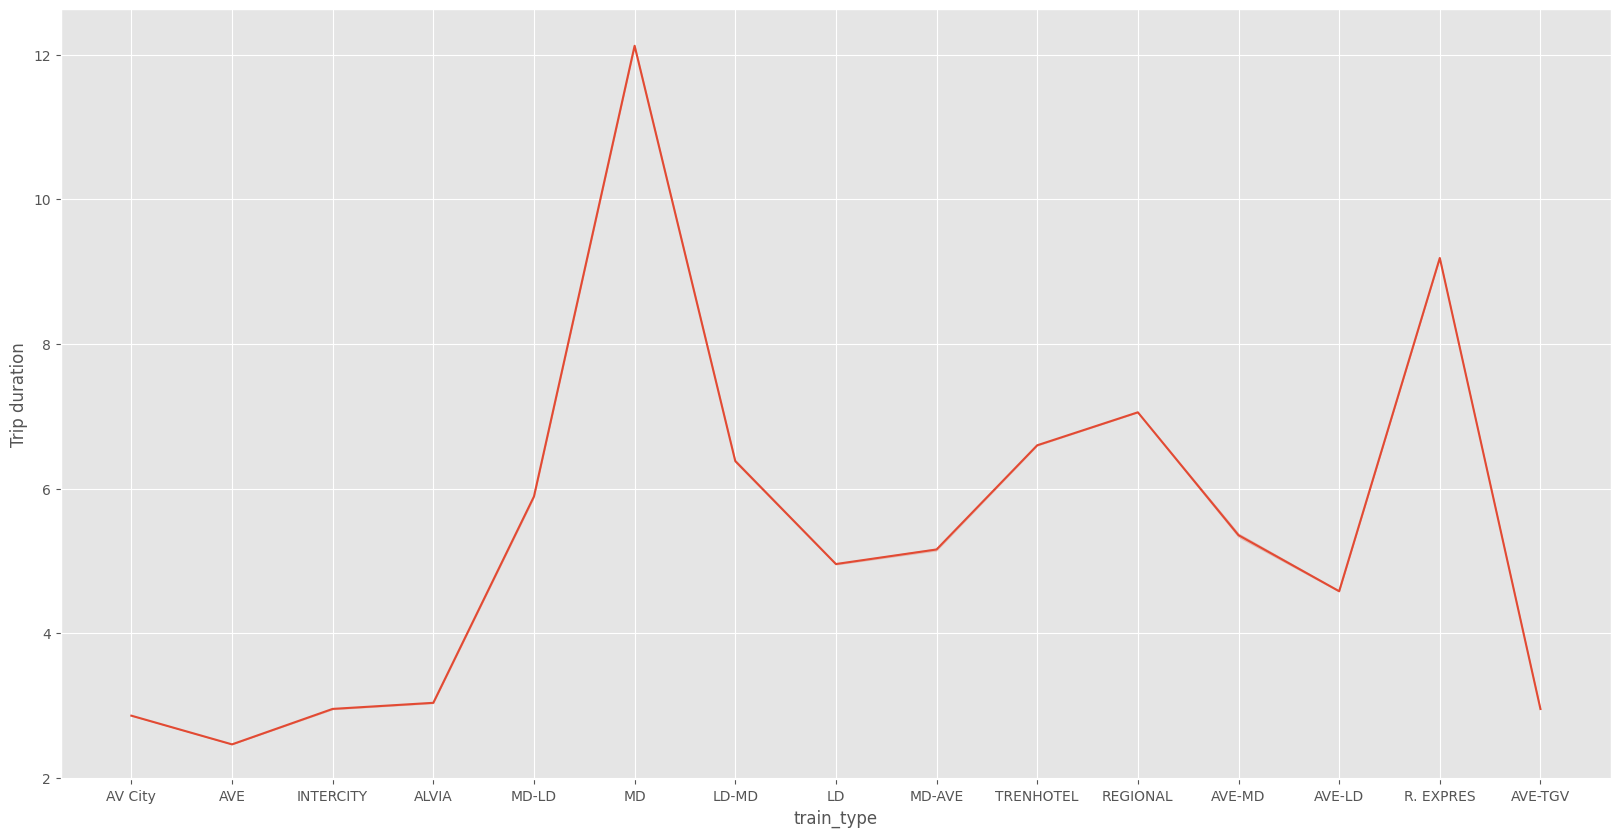

In [ ]:
# any relationship between train type and Trip duration ?


plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_type",y="Trip duration")

- the people prefer train AVE because faster

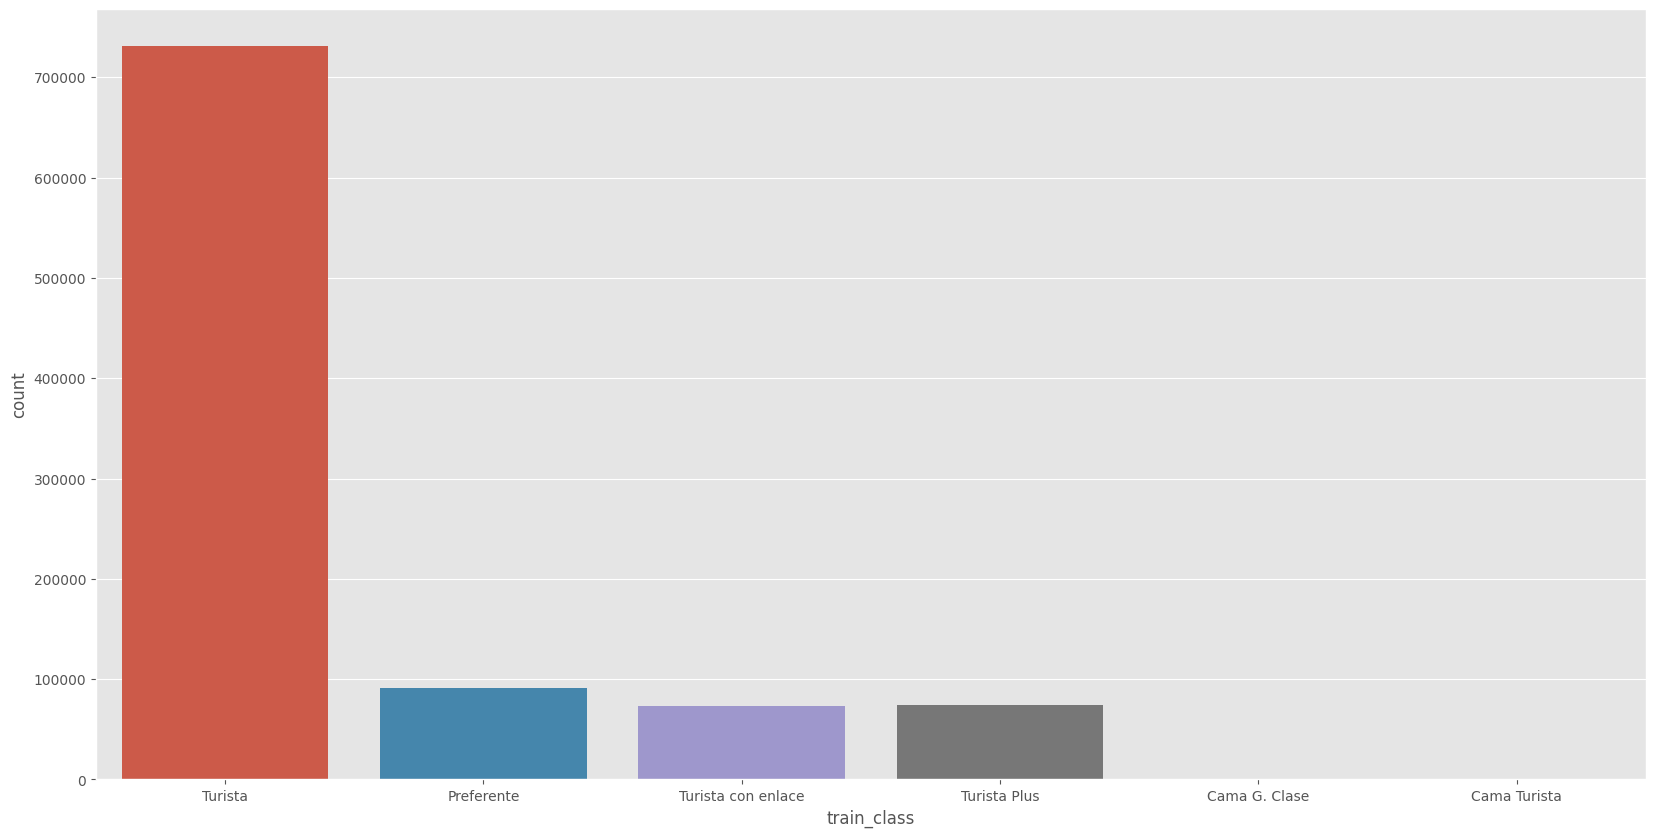

In [ ]:
# the train class more popular there/ more using
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(x='train_class', data=df)
plt.show()

#### The train class more popular there/ more using :

- Turista 75%
- Preferente 10%
- Turista Plus 8%
- Turista con enlace 7%
- Cama Turista 0
- Cama G. Clase 0


<Axes: xlabel='train_class', ylabel='price'>

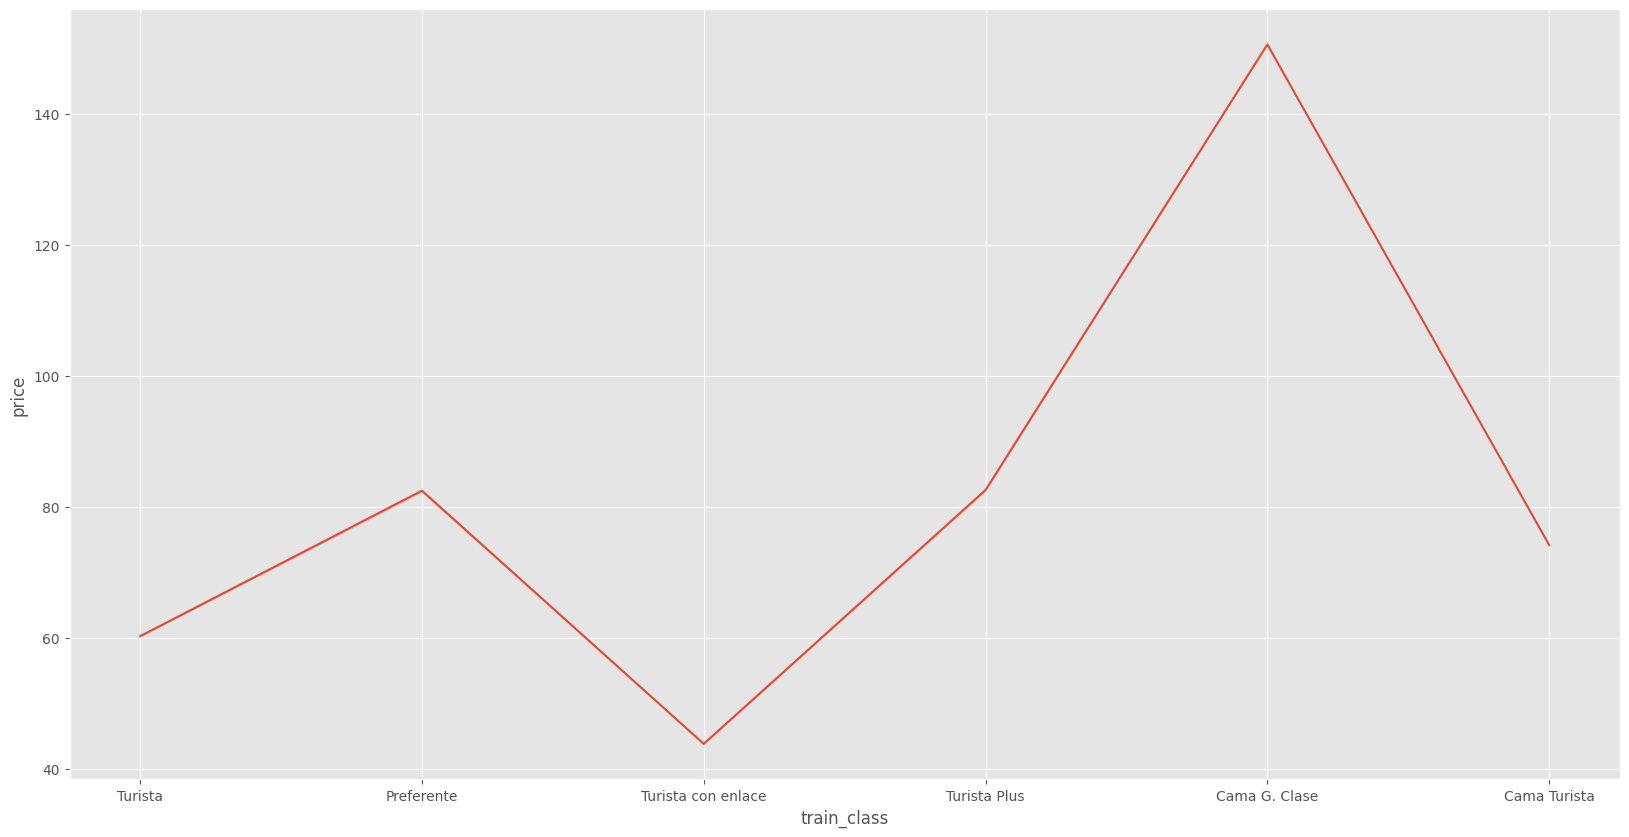

In [ ]:
# any relationship between train class  and price ?


plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_class",y="price")

<Axes: xlabel='train_class', ylabel='Trip duration'>

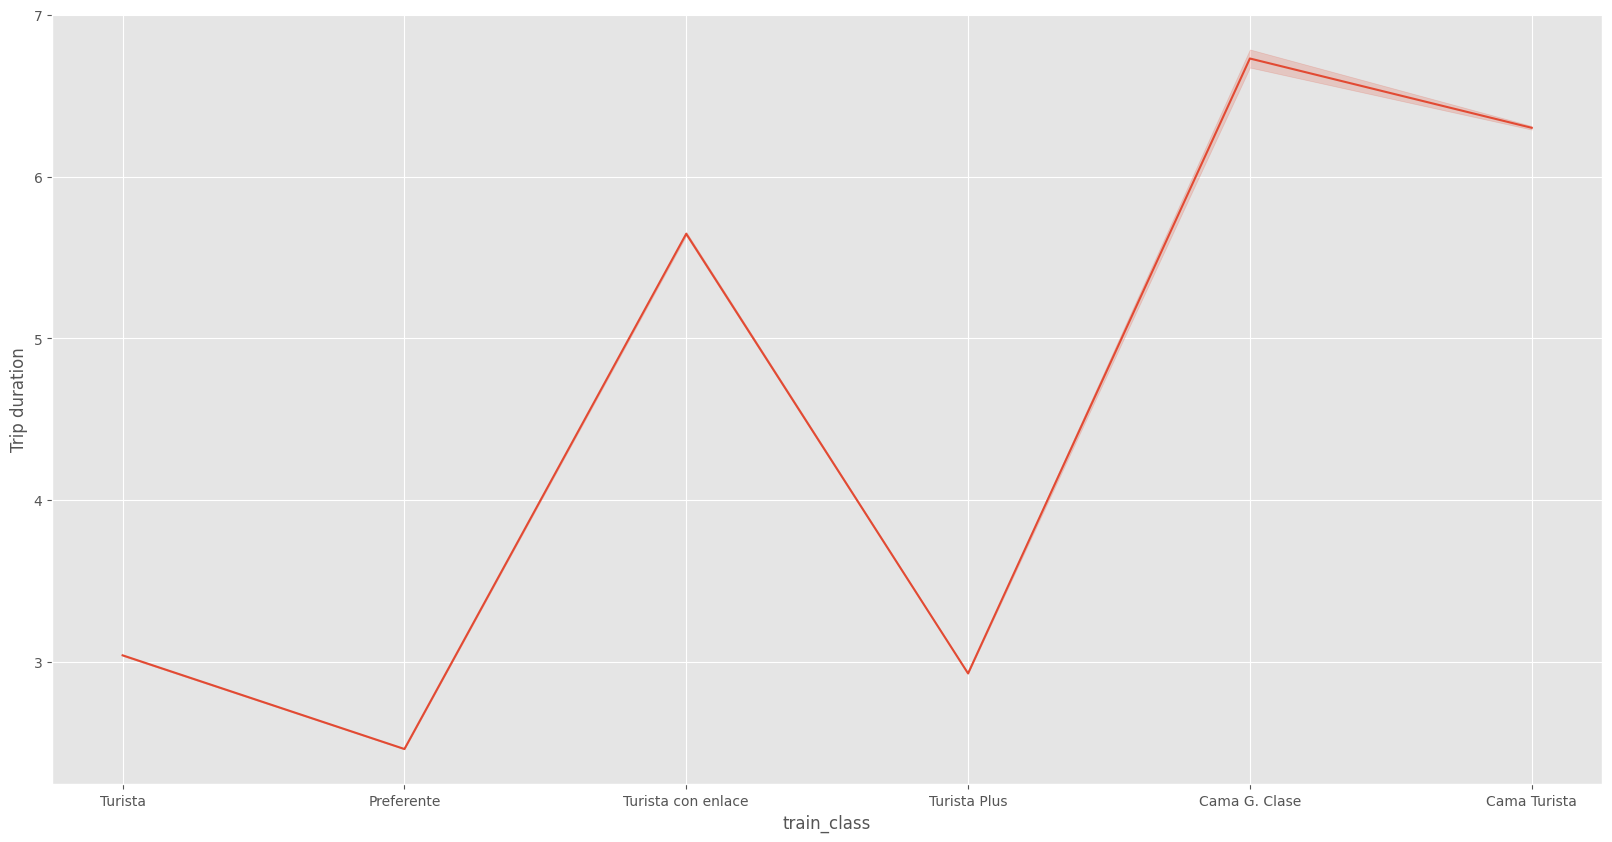

In [ ]:
# any relationship between train class  and Trip duration ?

plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="train_class",y="Trip duration")

- The people prefer train class Turista because faster and cheaper

<function matplotlib.pyplot.show(close=None, block=None)>

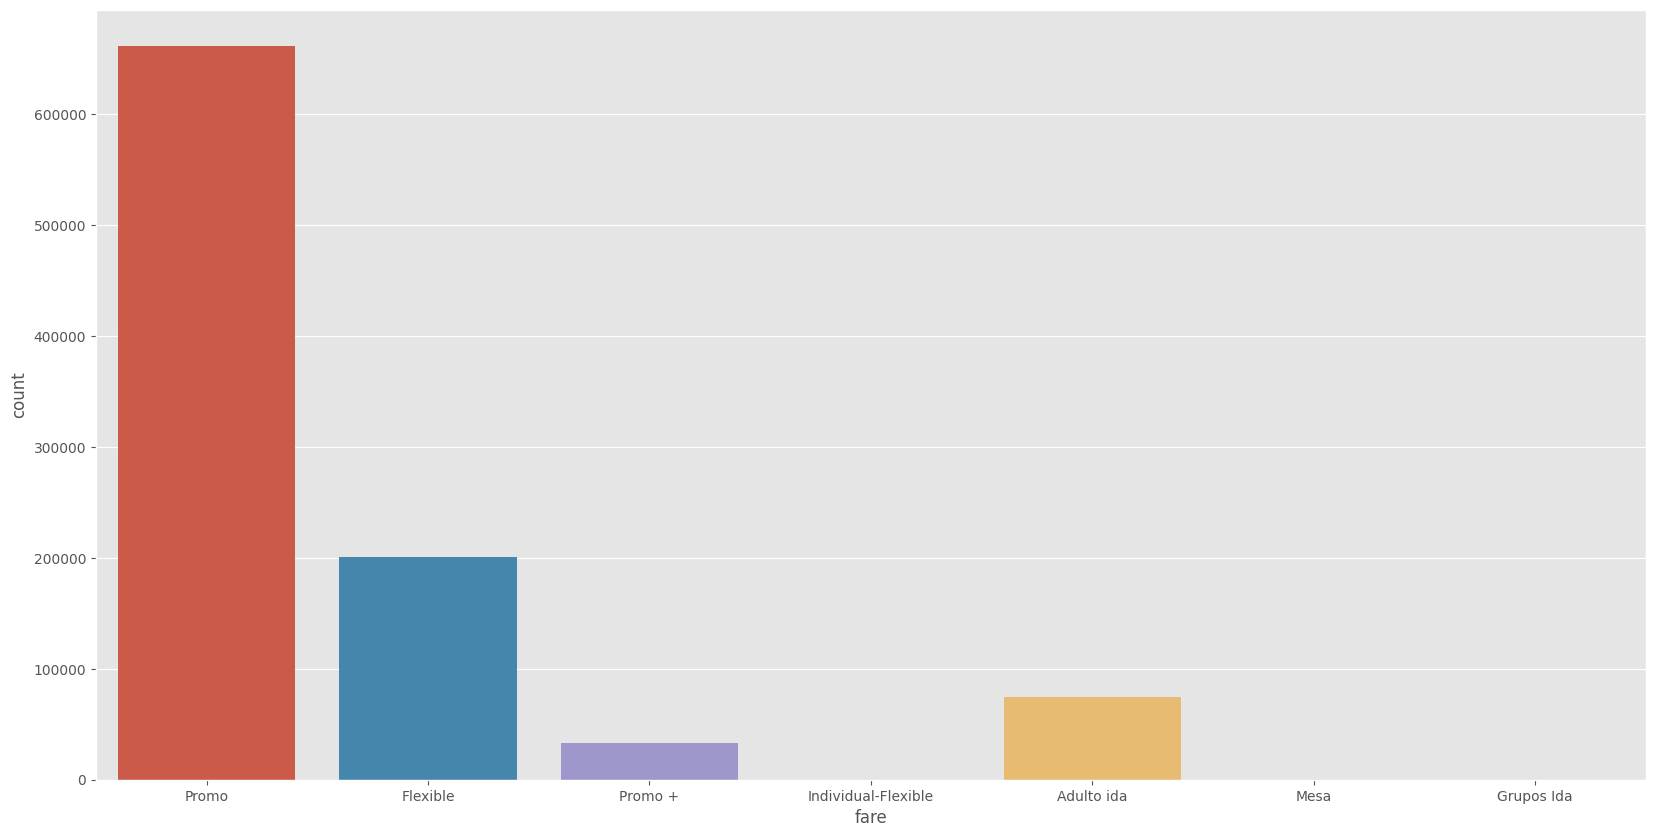

In [ ]:
# the fare more popular there/ more using

plt.figure(figsize=(20,10))
sns.countplot(x= 'fare', data=df)
plt.show

#### The fare more popular there/ more using :

- Promo 68%
- Flexible 23%
- Adulto ida 7%
- Promo 2%
- Individual-Flexible 0
- Mesa 0
- Grupos Ida 0

<Axes: xlabel='fare', ylabel='price'>

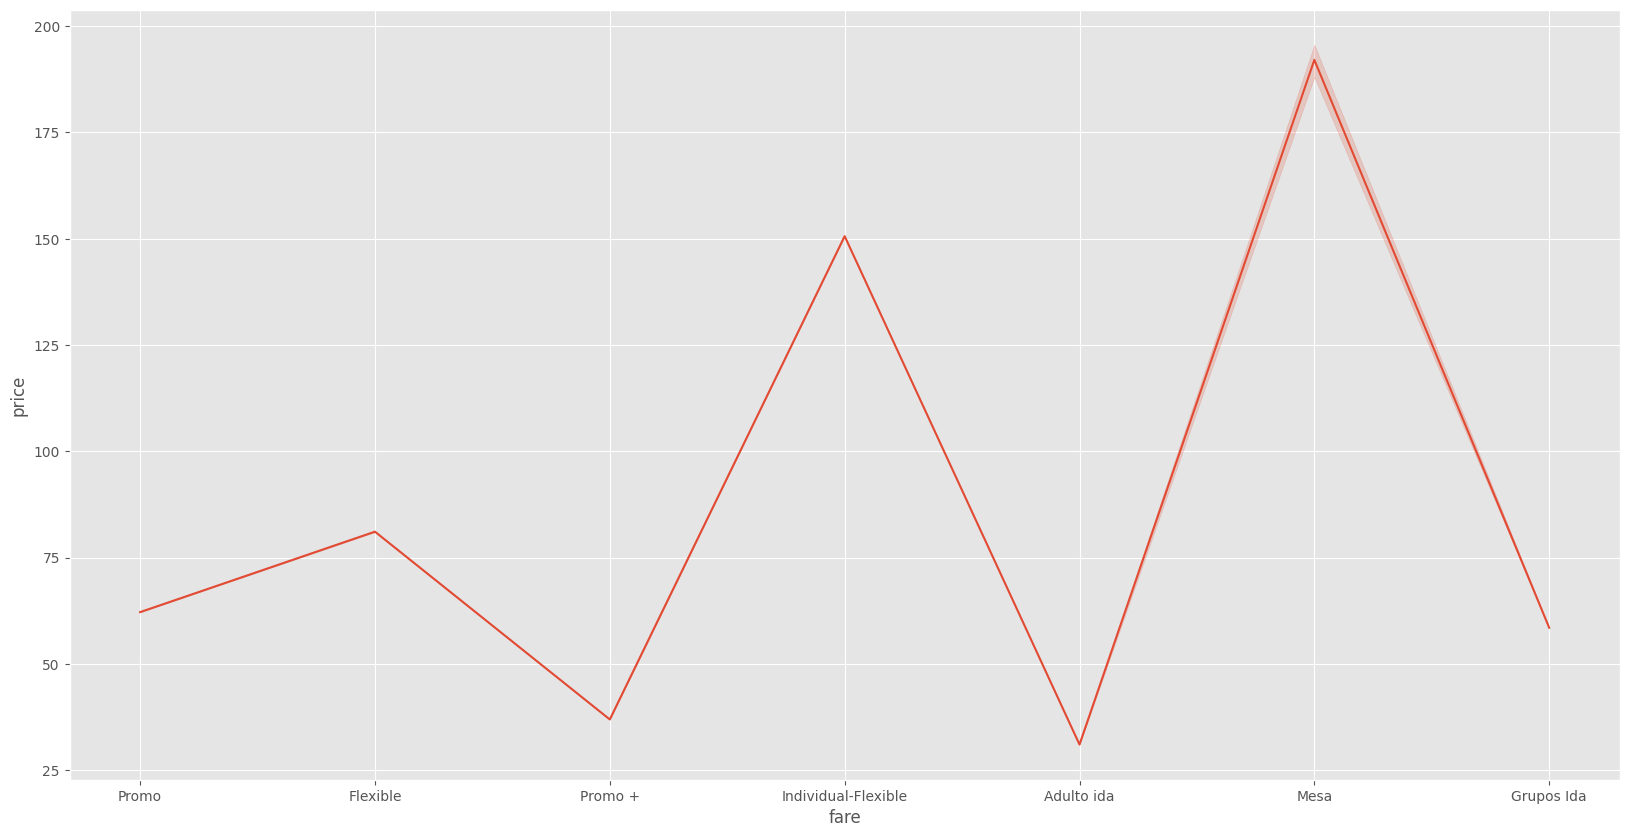

In [ ]:
# any relationship between fare  and price ?


plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="fare",y="price")

<Axes: xlabel='fare', ylabel='Trip duration'>

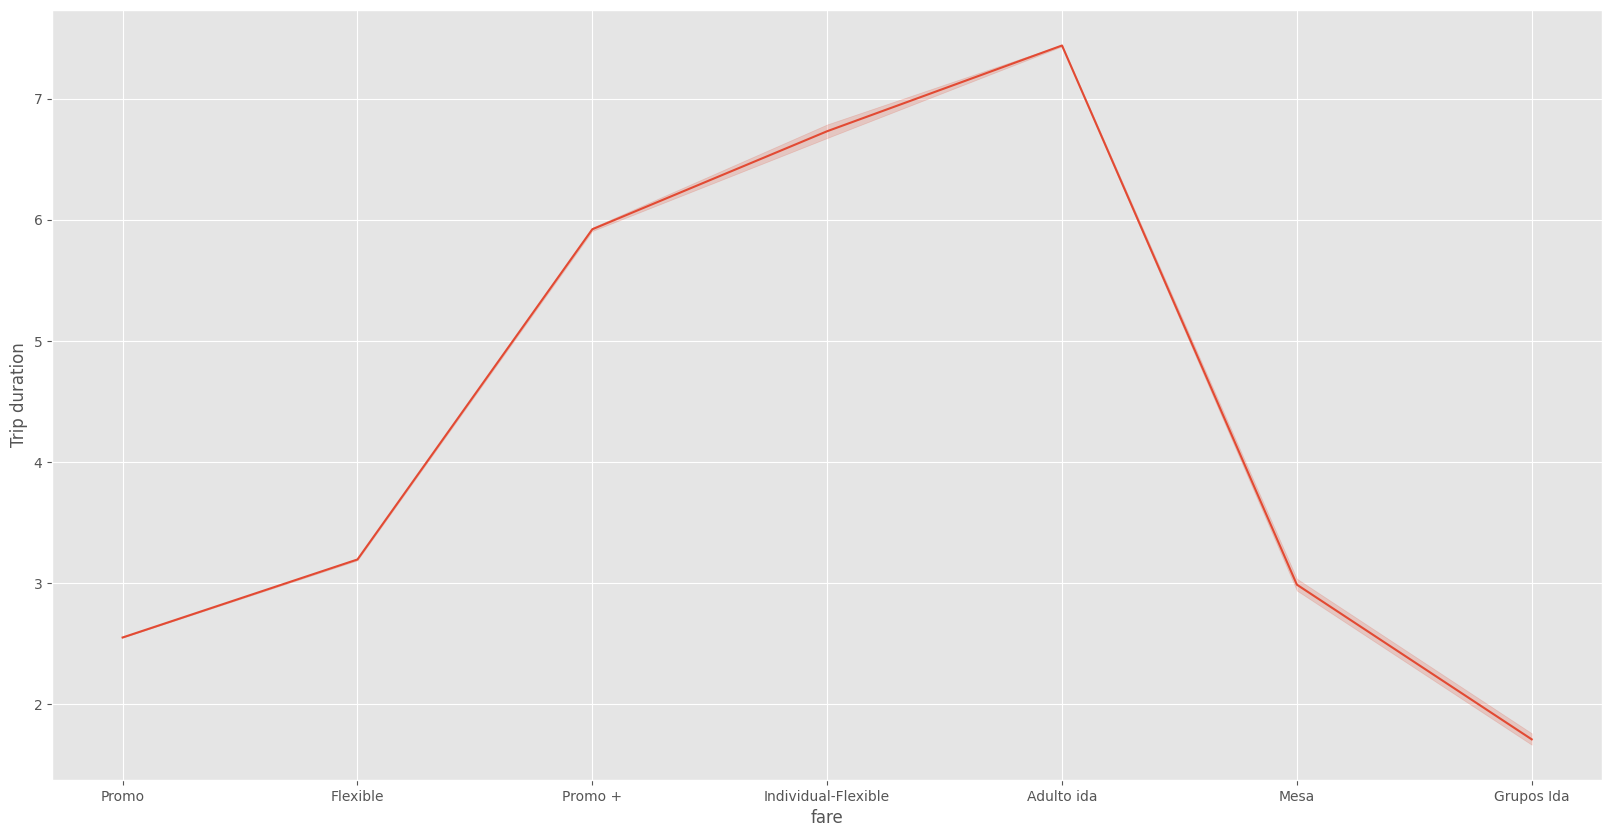

In [ ]:
 # any relationship between fare  and Trip duration ?

plt.figure(figsize=(20,10))
sns.lineplot(data=df,x="fare",y="Trip duration")

- The people prefer fare - Promo-  because faster and cheaper around 60 $ and the time 2:30

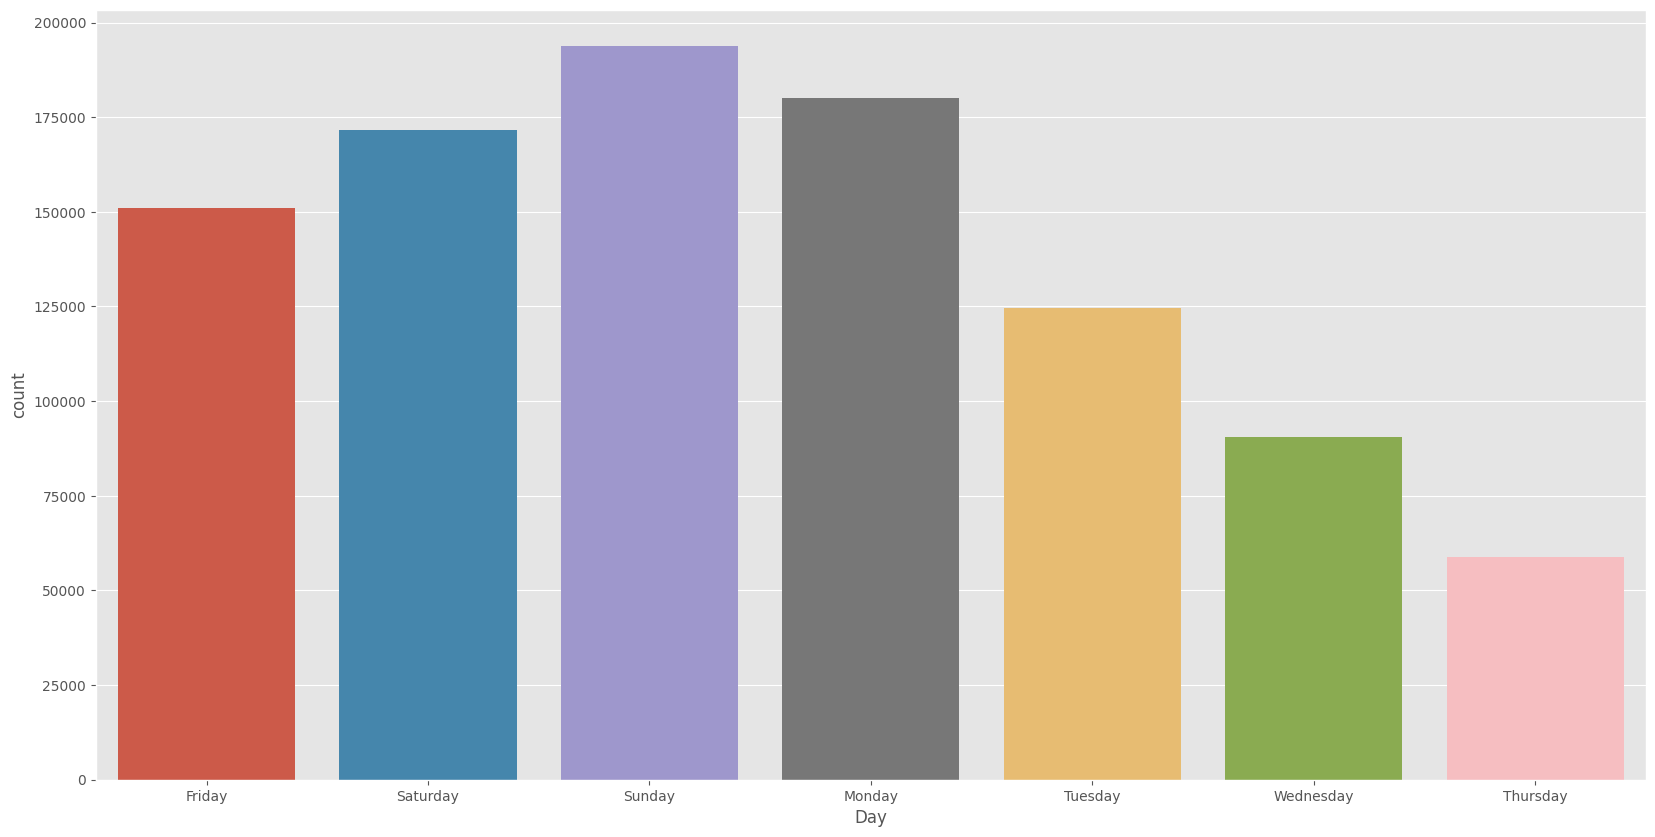

In [ ]:
# the more popular Days the people more using train
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(x='Day', data=df)
plt.show()

- Monday 17 %
- Tuesday 15%
- Wednesday 14 %
- Thursday 12%
- Friday 13 %
- Saturday 13 %
- Sunday 16 %


<Axes: xlabel='Trip duration', ylabel='price'>

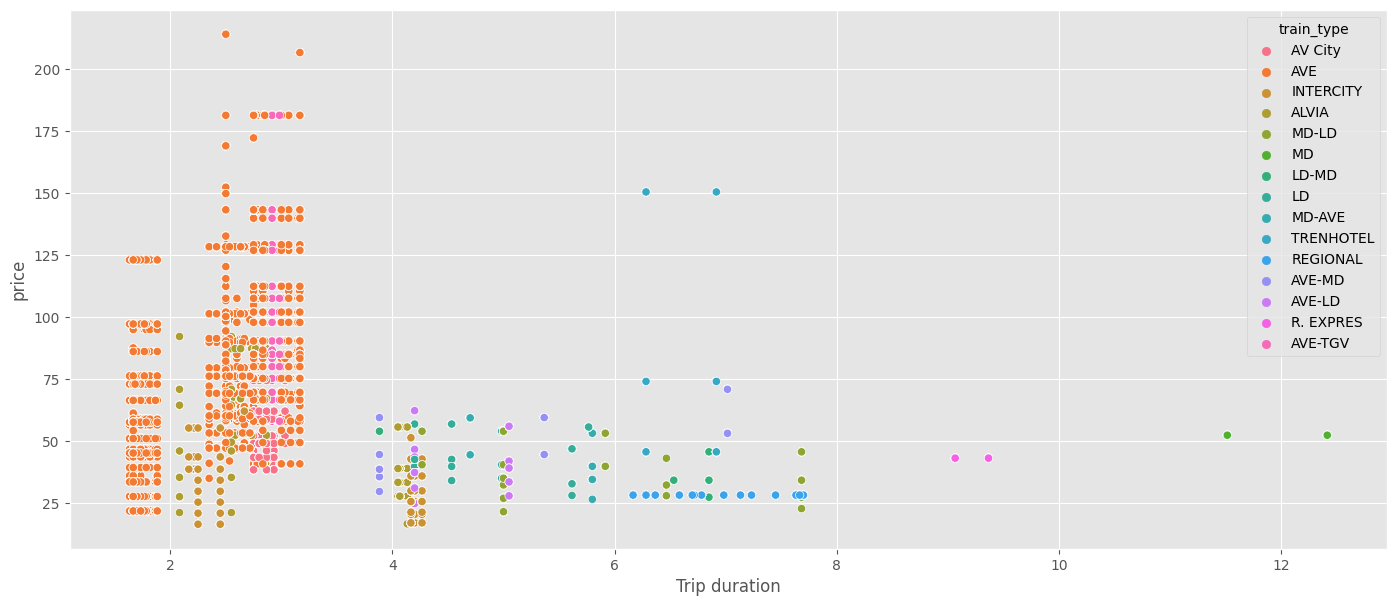

In [ ]:
# show graph in any relationship between time and price

plt.figure(figsize=(17,7))
sns.scatterplot(data=df,x="Trip duration",y="price",hue="train_type")

# Make group by and fitter

In [ ]:
# make filter origin from Madrid to other destination

df_M=df[(df["origin"]=="MADRID")]
df_M.head()

,level_0,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo
1,1,1,1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,Turista,Promo
2,2,2,2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,Turista,Promo
3,3,3,3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,Preferente,Promo
4,5,5,5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,Turista,Promo


In [ ]:
# make group by

M=df_M.groupby(["destination","train_type"],as_index=False)["Trip duration","price"].mean()
M

<ipython-input-233-7be9b78c7733>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  M=df_M.groupby(["destination","train_type"],as_index=False)["Trip duration","price"].mean()


,destination,train_type,Trip duration,price
0,BARCELONA,AVE,2.813269,86.732331
1,BARCELONA,AVE-TGV,2.983333,88.485142
2,BARCELONA,R. EXPRES,9.366667,43.250000
3,PONFERRADA,ALVIA,4.050000,45.725314
4,PONFERRADA,AVE-LD,4.200000,43.345884
5,PONFERRADA,AVE-MD,4.088621,48.286249
6,PONFERRADA,LD,4.200000,46.906460
7,PONFERRADA,LD-MD,5.943869,38.743178
8,PONFERRADA,TRENHOTEL,6.283333,48.930452
9,SEVILLA,ALVIA,2.584979,66.708490


In [ ]:
# drow interactive graph

px.scatter(M,x="Trip duration",y="price",animation_frame="destination",color="train_type")

In [ ]:
# make filter origin from BARCELONA to other destination

df_B=df[(df["origin"]=="BARCELONA")]
df_B.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration
1629,1815,1815,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 05:50:00,2019-04-25 08:20:00,AVE,49.55,Turista,Promo,Friday,2.500000
1630,1816,1816,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 06:05:00,2019-04-25 09:15:00,AVE,80.15,Turista Plus,Promo,Friday,3.166667
1631,1817,1817,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 06:25:00,2019-04-25 08:55:00,AVE,88.95,Turista,Promo,Friday,2.500000
1632,1818,1818,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 06:40:00,2019-04-25 09:25:00,AVE,90.50,Turista Plus,Promo,Friday,2.750000
1633,1819,1819,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 07:00:00,2019-04-25 09:30:00,AVE,127.10,Turista,Flexible,Friday,2.500000


In [ ]:
# make group by

B=df_B.groupby(["destination","train_type"])["Trip duration","price"].mean()
B

<ipython-input-236-f4f3f4208494>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Trip duration      price
destination train_type                          
MADRID      AVE              2.825865  86.154372
            AVE-TGV          2.916667  85.685675
            R. EXPRES        9.066667  43.250000

<Axes: xlabel='destination,train_type'>

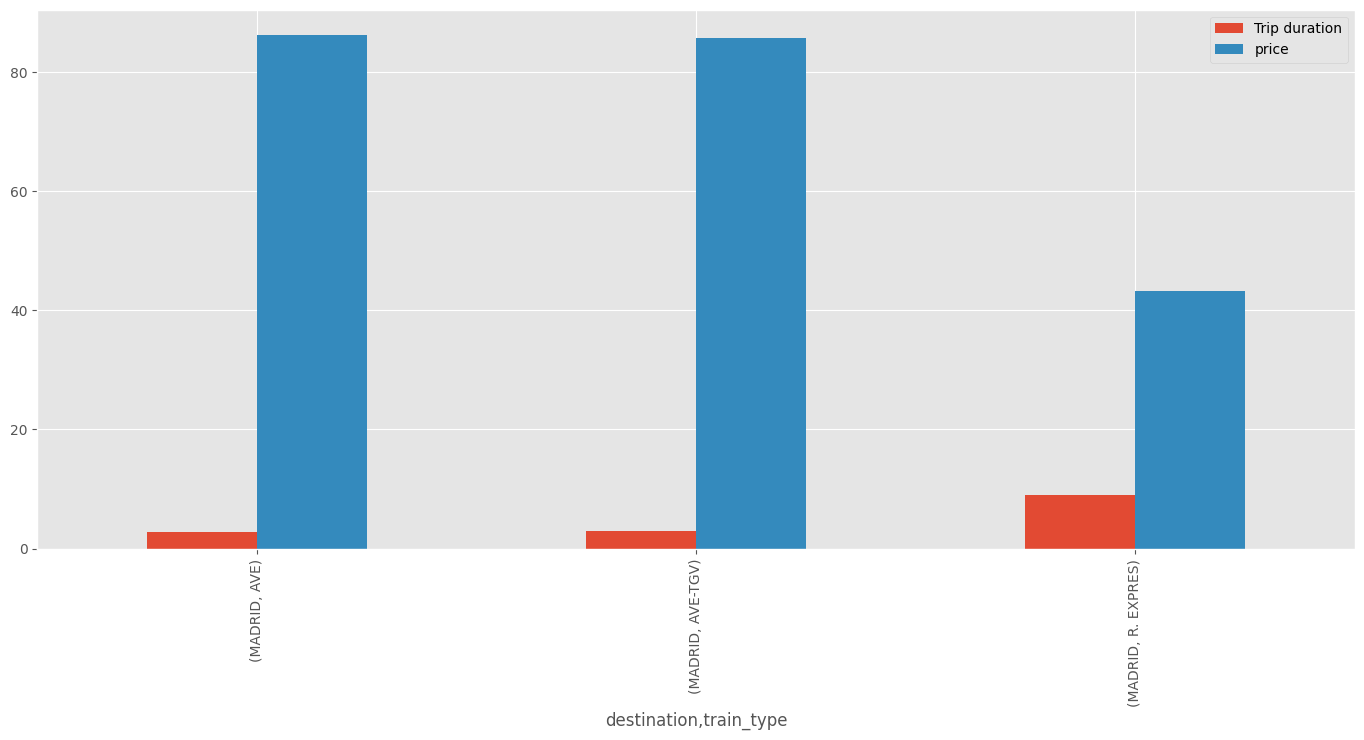

In [ ]:
# make graph
B.plot(kind="bar",figsize=(17,7))

In [ ]:
# make filter origin from SEVILLA to other destination

df_S=df[(df["origin"]=="SEVILLA")]
df_S.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration
58,67,67,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 06:10:00,2019-05-28 08:58:00,AV City,43.55,Turista,Promo,Friday,2.800000
59,68,68,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 06:45:00,2019-05-28 09:15:00,AVE,76.30,Turista,Flexible,Friday,2.500000
60,69,69,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 07:15:00,2019-05-28 09:55:00,AVE,53.40,Turista,Promo,Friday,2.666667
61,70,70,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 07:40:00,2019-05-28 10:05:00,AVE,60.30,Turista,Promo,Friday,2.416667
62,71,71,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 08:45:00,2019-05-28 11:15:00,AVE,76.30,Turista,Flexible,Friday,2.500000


In [ ]:
# make group by

S=df_S.groupby(["destination","train_type"])["Trip duration","price"].mean()
S

<ipython-input-239-d1926a910c71>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Trip duration      price
destination train_type                          
MADRID      ALVIA            2.724662  67.034117
            AV City          2.879251  51.282953
            AVE              2.536061  65.779290
            INTERCITY        2.666667  62.200000
            LD-MD            6.850000  35.795922
            MD              12.123714  52.500000

<Axes: xlabel='destination,train_type'>

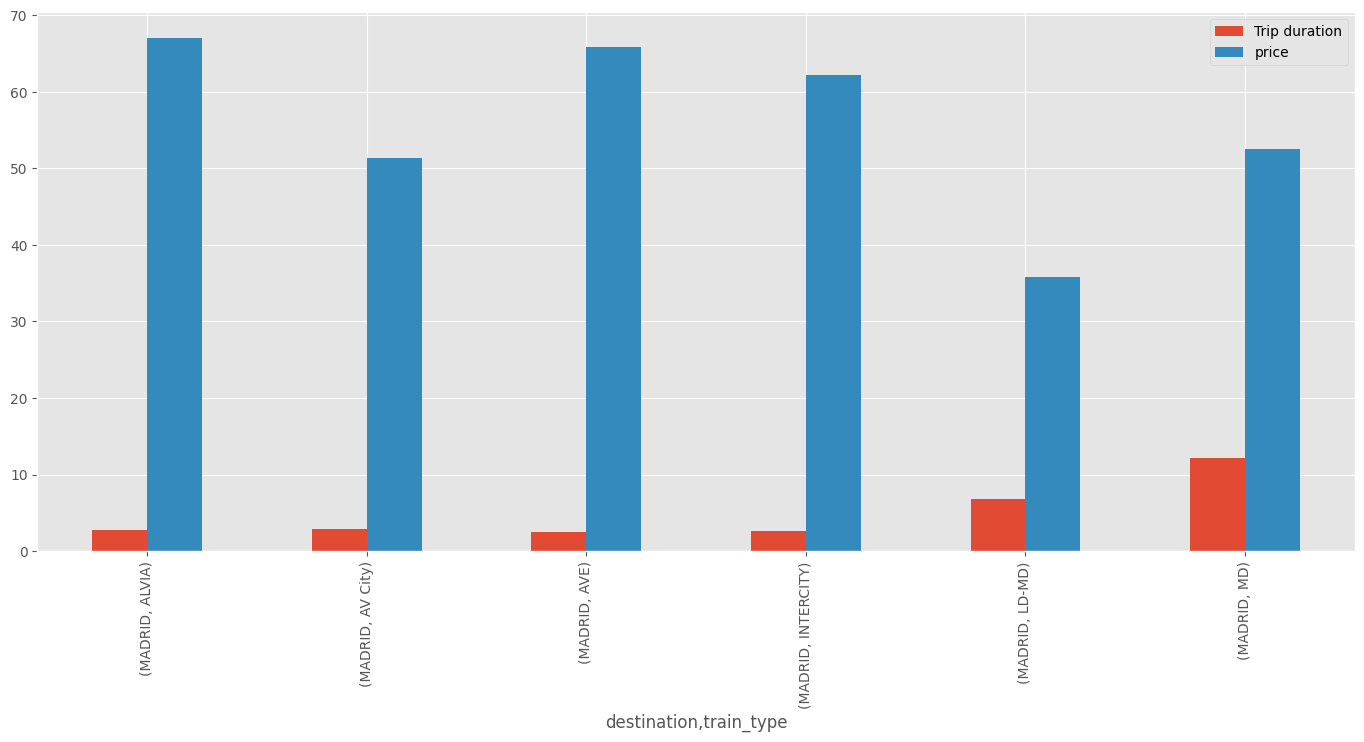

In [ ]:
# make graph
S.plot(kind="bar",figsize=(17,7))

In [ ]:
# make filter origin from VALENCIA to other destination

df_V=df[(df["origin"]=="VALENCIA")]
df_V.head()

,level_0,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Trip duration
4016,4433,4433,4433,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 10:40:00,2019-04-28 12:27:00,AVE,73.10,Turista,Flexible,1.783333
4152,4573,4573,4573,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 06:38:00,2019-04-28 13:37:00,REGIONAL,28.35,Turista,Adulto ida,6.983333
4153,4574,4574,4574,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 08:00:00,2019-04-28 09:53:00,AVE,66.55,Preferente,Promo,1.883333
4154,4575,4575,4575,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 09:50:00,2019-04-28 16:58:00,REGIONAL,28.35,Turista,Adulto ida,7.133333
4155,4576,4576,4576,2019-04-19 06:23:50,VALENCIA,MADRID,2019-04-28 12:40:00,2019-04-28 14:20:00,AVE,51.15,Turista,Promo,1.666667


In [ ]:
# make group by

V=df_V.groupby(["destination","train_type"])["Trip duration","price"].mean()
V

<ipython-input-490-704f4d3897bb>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  V=df_V.groupby(["destination","train_type"])["Trip duration","price"].mean()


Trip duration      price
destination train_type                          
MADRID      ALVIA            2.550000  46.821355
            AVE              1.729226  44.701462
            INTERCITY        3.100947  31.855517
            MD-LD            6.466667  30.240926
            REGIONAL         7.494382  28.350000

<Axes: xlabel='destination,train_type'>

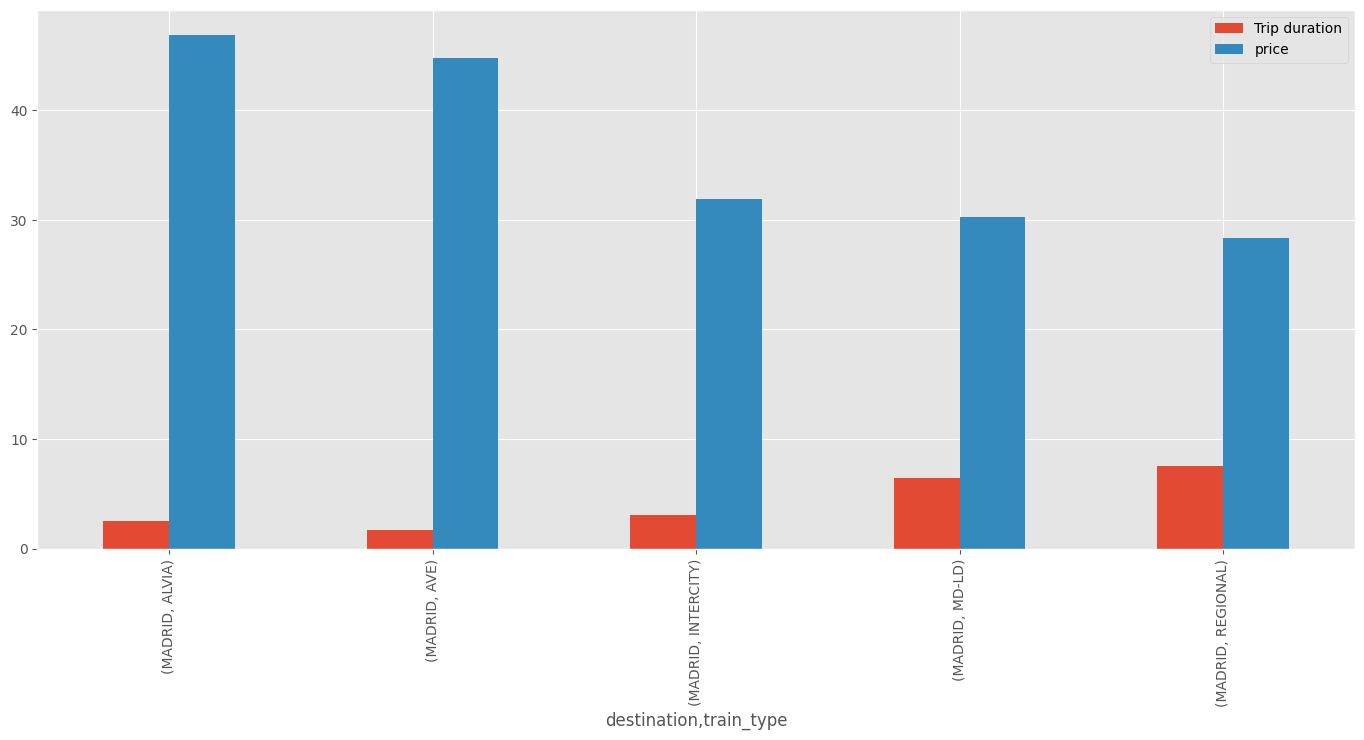

In [ ]:
# make graph
V.plot(kind="bar",figsize=(17,7))

In [ ]:
# make filter origin from PONFERRADA to other destination

df_P=df[(df["origin"]=="PONFERRADA")]
df_P.head()

,index,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,Day,Trip duration
567,680,680,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 11:28:00,2019-04-28 16:00:00,LD,57.00,Turista con enlace,Flexible,Friday,4.533333
568,681,681,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 11:44:00,2019-04-28 16:00:00,MD-LD,54.10,Turista con enlace,Flexible,Friday,4.266667
569,683,683,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 15:00:00,2019-04-28 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,Friday,4.700000
570,684,684,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 17:15:00,2019-04-28 23:03:00,MD-AVE,39.95,Turista con enlace,Promo +,Friday,5.800000
571,685,685,2019-04-19 05:35:40,PONFERRADA,MADRID,2019-04-28 17:15:00,2019-04-28 23:10:00,MD-LD,53.30,Turista con enlace,Flexible,Friday,5.916667


In [ ]:
# make group by

P=df_P.groupby(["destination","train_type"])["Trip duration","price"].mean()
P

<ipython-input-245-e5da0a6a38aa>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Trip duration      price
destination train_type                          
MADRID      ALVIA            4.079612  35.338263
            LD               5.031134  42.737152
            MD-AVE           5.156681  45.931347
            MD-LD            4.757322  42.396838
            TRENHOTEL        6.916667  47.794803

<Axes: xlabel='destination,train_type'>

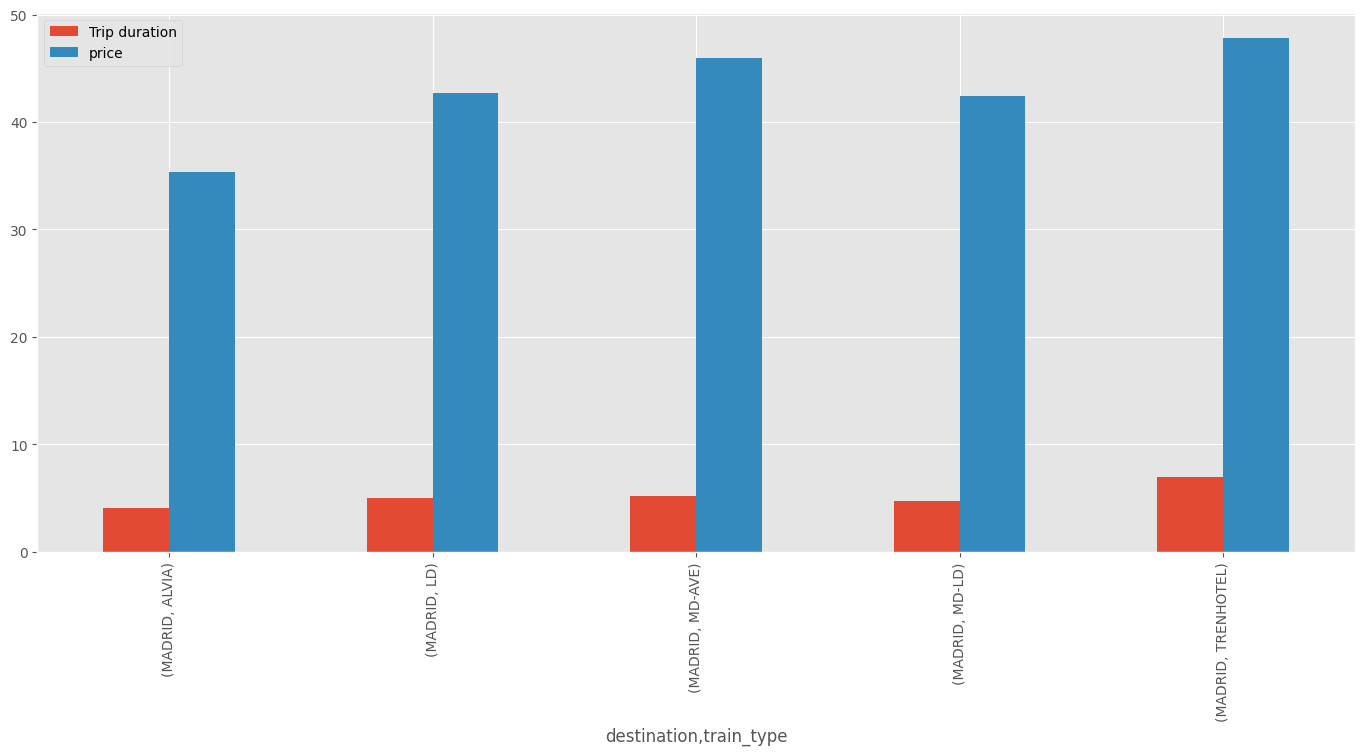

In [ ]:
# make graph
P.plot(kind="bar",figsize=(17,7))

# Analysis Results:

## Public Transportations in Spain

#### This sample around 30 days , 2.5 million rows.
#### The columns:
- Insert date -> Date
- Origin - from where
- Destination
- Start_date - start trip
- End_date- end trip
- Train_type
- Price
- Train_class
- Fare
-------------

- We have 2,579,771 rows.
- We have 2,579,771 rows.after handle missing data and 10 columns

##### Average price 63


##### The data from 19/4/2019 to 18/5/2019 = 29 Days


#### The train strat from  MADRID  to 5 destination in insite MADRID , BARCELONA  , SEVILLA  , VALENCIA ,PONFERRADA .
#### This 5 destination just going to MADRID .


### The people start trip from this stations.
- MADRID 52%
- BARCELONA 15%
- SEVILLA 15%
- VALENCIA 13%
- PONFERRADA 5 %


### The people finish trip from this stations:
- MADRID 47%
- BARCELONA 18%
- SEVILLA 16%
- VALENCIA 15 %
- PONFERRADA 4%

### Most people using train insite Madrid



### The train type more popular there/ more using:
- AVE 70%
- ALVIA 7%
- REGIONAL 5%

- Other train less 5 %

### The people prefer train AVE because faster but not cheaper.





### The train class more popular there/ more using :
- Turista 75%
- Preferente 10%
- Turista Plus 8%
- Turista con enlace 7%
- Cama Turista 0
- Cama G. Clase 0


### The people prefer train class Turista because faster and cheaper




### The fare more popular there/ more using :
- Promo 68%
- Flexible 23%
- Adulto ida 7%
- Promo 2%
- Individual-Flexible 0
- Mesa 0
- Grupos Ida 0


### The people prefer fare - Promo- because faster and cheaper around 60 €  and the time 2:30




#### The days using train
- Monday 17 %
- Tuesday 15%
- Wednesday 14 %
- Thursday 12%
- Friday 13 %
- Saturday 13 %
- Sunday 16 %


# Linear Regression

##### Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### import dataset

In [ ]:
df =pd.read_csv("./public_transportation_data.csv")

#### Predict the amount of people record in each year

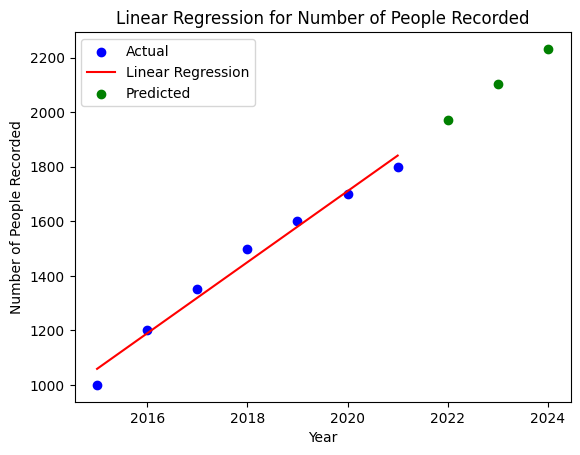

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Historical data
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
people = [1000, 1200, 1350, 1500, 1600, 1700, 1800]  # Number of people recorded

# Convert the data to numpy arrays
X = np.array(years).reshape(-1, 1)  # Reshape to a 2D array
y = np.array(people)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the number of people for future years
future_years = np.array([2022, 2023, 2024]).reshape(-1, 1)
predicted_people = model.predict(future_years)

# Plot the historical data and the linear regression line
plt.scatter(years, people, color='blue', label='Actual')
plt.plot(years, model.predict(X), color='red', label='Linear Regression')
plt.scatter(future_years, predicted_people, color='green', label='Predicted')

plt.xlabel('Year')
plt.ylabel('Number of People Recorded')
plt.title('Linear Regression for Number of People Recorded')
plt.legend()
plt.show()

#### Find actual duration and predition price

<ipython-input-15-ff7dfb234cf4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['actual_duration'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60
<ipython-input-15-ff7dfb234cf4>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predicted_price'] = predictions


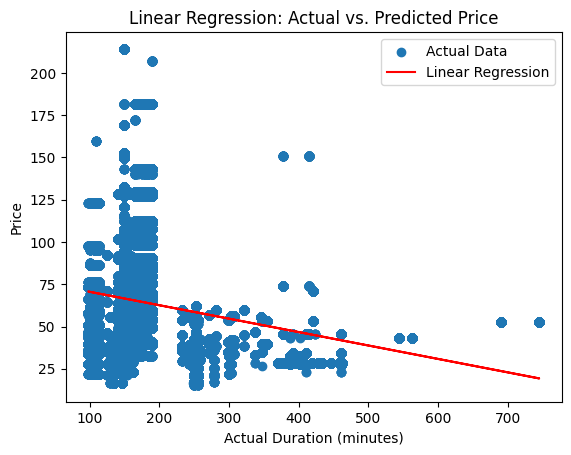

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the CSV file
df = pd.read_csv('/content/public_transportation_data.csv')

# Convert start_date and end_date columns to datetime format
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['start_date', 'end_date'])

# Calculate the actual duration between start_date and end_date
df['actual_duration'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60

# Features for prediction
features = ['actual_duration']

# Target variable (e.g., price)
target = 'price'

# Drop rows with missing values in the target variable
df = df.dropna(subset=[target])

# Extract features and target variable
X = df[features]
y = df[target]

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict the target variable based on the actual_duration
predictions = model.predict(X)

# Add the predicted values to the DataFrame
df['predicted_price'] = predictions

# Plotting the actual data points and linear regression line
plt.scatter(df['actual_duration'], df['price'], label='Actual Data')
plt.plot(df['actual_duration'], df['predicted_price'], color='red', label='Linear Regression')
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Price')
plt.title('Linear Regression: Actual vs. Predicted Price')
plt.legend()
plt.show()


#### Maximum Cost per month

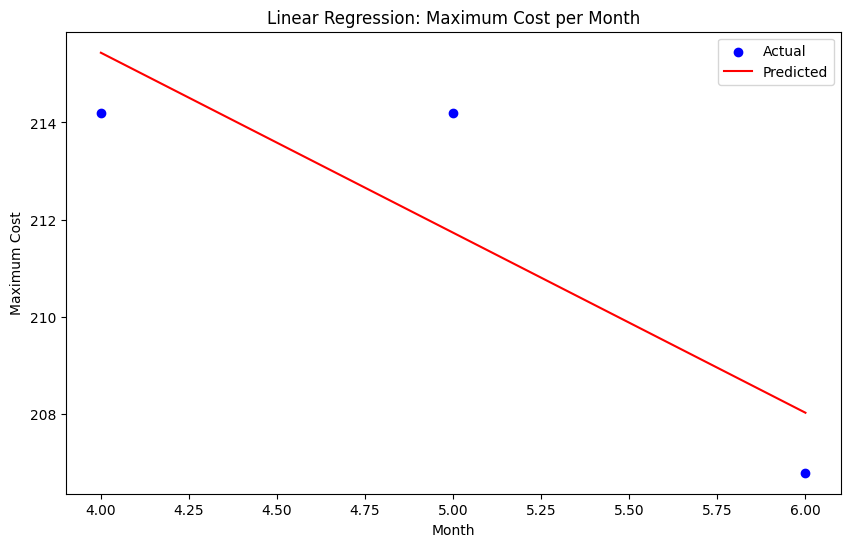

In [ ]:
# Load the dataset
data = pd.read_csv('/content/public_transportation_data.csv')

# Convert the 'start_date' column to datetime format
data['start_date'] = pd.to_datetime(data['start_date'])

# Extract the month and year from the 'start_date' column
data['month'] = data['start_date'].dt.month
data['year'] = data['start_date'].dt.year

# Calculate the maximum cost for each month
max_costs = data.groupby(['year', 'month'])['price'].max().reset_index()

# Perform linear regression
X = max_costs['month'].values.reshape(-1, 1)
y = max_costs['price'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)

# Predict the maximum cost for every month
predicted_costs = regressor.predict(X)

# Plot the predicted costs
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predicted_costs, color='red', label='Predicted')
plt.xlabel('Month')
plt.ylabel('Maximum Cost')
plt.title('Linear Regression: Maximum Cost per Month')
plt.legend()
plt.show()

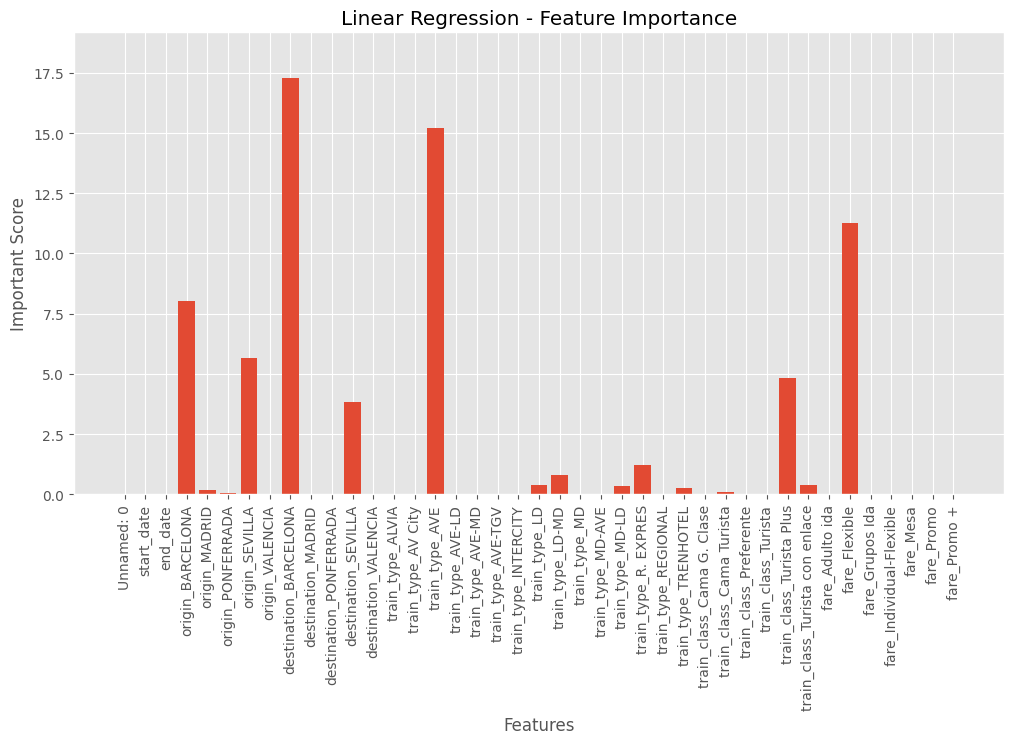

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('/content/public_transportation_data.csv')  # Replace 'your_dataset.csv' with the actual filename/path of your dataset

# Exclude 'insert_date' column
data = data.drop(['insert_date'], axis=1)

# Convert datetime columns to numeric representation
date_columns = ['start_date', 'end_date']
for column in date_columns:
    data[column] = pd.to_datetime(data[column]).astype(int)

# Separate the features (X) and target variable (y)
X = data.drop(['price'], axis=1)  # Exclude the target variable 'price'
y = data['price']

# Remove rows with missing values in the target variable
X = X[~np.isnan(y)]
y = y[~np.isnan(y)]

# Perform one-hot encoding on categorical columns
categorical_cols = ['origin', 'destination', 'train_type', 'train_class', 'fare']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_encoded, y)

# Retrieve the coefficients
coefficients = model.coef_

# Retrieve the feature names
feature_names = X_encoded.columns.tolist()

# Create a bar plot of feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Important Score')
plt.title('Linear Regression - Feature Importance')
plt.xticks(rotation=90)
plt.ylim(bottom=0)  # Set the lower limit of the y-axis to zero
plt.show()

